In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [2]:
dataset = pd.read_csv("bankloan.csv")
df = pd.DataFrame(dataset)
df = df.dropna()
df = df.drop("Loan_ID", axis=1)
df["LoanAmount"] = (df["LoanAmount"]*1000).astype(int)
Counter(df["Loan_Status"])

Counter({'N': 148, 'Y': 332})

In [3]:
pre_y = df["Loan_Status"]
pre_X = df.drop("Loan_Status", axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))

In [5]:
smote= SMOTE(sampling_strategy="minority")
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [6]:
Counter(y)

Counter({0: 332, 1: 332})

In [15]:
# extra code to save the figures as high-res PNGs for the book
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer="random_normal"))
classifier.add(Dense(4, activation="relu", kernel_initializer="random_normal"))
classifier.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))
classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.8908


[0.237838476896286, 0.8907721042633057]

In [10]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


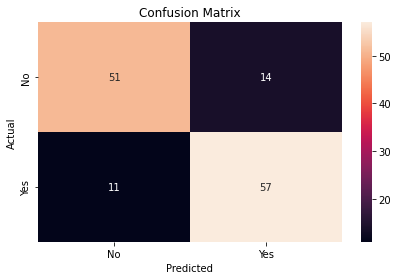

In [16]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cn, annot=True, ax = ax) # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel("Predicted");ax.set_ylabel('Actual');
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(["No", "Yes"]);
save_fig("Confusion_matrix")